Importing modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

READING FILE

In [ ]:
file_path = "/home/indira/Projects/Datasci/KNN/teleCust1000t.csv"
df=pd.read_csv(file_path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


DATA VISUALIZATION AND ANALYSIS

Value of each class is shown as:

In [5]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Plotting in histogram

array([[<Axes: title={'center': 'income'}>]], dtype=object)

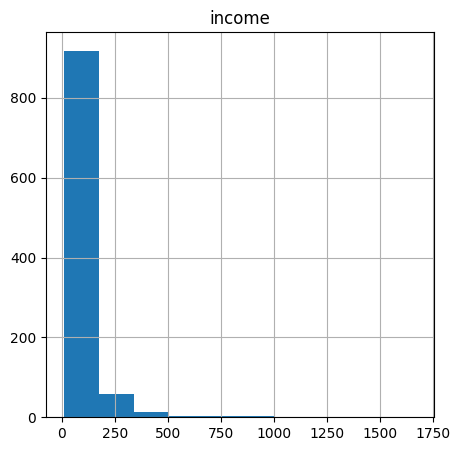

In [6]:
df.hist(column='income',bins=10,figsize=(5,5))

The columns present in the dataset are taken as feature sets , X:

In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Converting pandas dataframe into numpy array so as to use scikit-learn

In [8]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Our labels are:

In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

DATA NORMALIZATION

Data is standarized which gives zero mean and unit variance , usually the best practice for algorithms based on distance between data points like KNN.

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

TRAIN TEST DATA SPLIT

Out of sample accuracy is the percentage of correct predictions made on the data that has not been trained . To obtain a good out of sample accuracy, the dataset is split into mutually exclusive train and test set.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =4)
print('Train set:',X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


CLASSIFICATION

KNN (K nearest neighbors)

Importing library

In [12]:
from sklearn.neighbors import KNeighborsClassifier

TRAINING

Starting the algorithm with k=4

In [13]:
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

PREDICTION

Using the model for making predictions on testset

In [17]:
y_= neigh.predict(X_test)
y_[0:5]

array([3, 1, 1, 2, 4])

ACCURACY EVALUATION

In [20]:
from sklearn import metrics
print("Train set accuracy:",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test,y_))

Train set accuracy: 0.82875
Test set accuracy: 1.0


Using different values of K


K is the number of nearest neighbors to examine which is to be choosen by users. 
For calculating accuracy , let's try different values of K.



In [22]:
Ks=10
mean_acc= np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_ = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_)

    std_acc[n-1] = np.std(y_==y_test)/np.sqrt(y_.shape[0])

mean_acc

PLOT

Plotting the model accuracy for different neighbors

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 